In [3]:
%pip install torch
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [5]:

# Generate synthetic data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(3) + 0.3*torch.rand(x.size())

In [6]:
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [7]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [8]:
# Train the network
for epoch in range(1000):
    optimizer.zero_grad()   
    output = net(x)
    loss = criterion(output, y)
    loss.backward()         
    optimizer.step()        
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0105
Epoch [200/1000], Loss: 0.0075
Epoch [300/1000], Loss: 0.0070
Epoch [400/1000], Loss: 0.0069
Epoch [500/1000], Loss: 0.0068
Epoch [600/1000], Loss: 0.0068
Epoch [700/1000], Loss: 0.0068
Epoch [800/1000], Loss: 0.0068
Epoch [900/1000], Loss: 0.0068
Epoch [1000/1000], Loss: 0.0068


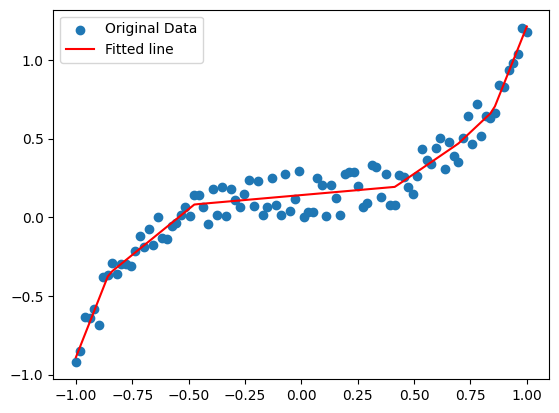

In [9]:
# Plot the results
predicted = net(x).data.numpy()
plt.scatter(x.data.numpy(), y.data.numpy(), label='Original Data')
plt.plot(x.data.numpy(), predicted, label='Fitted line', color='r')
plt.legend()
plt.show()
